# Youtube Views Prediction

**Dataset Overview :** <br>
YouTube (the world's famous video-sharing platform) maintains a list of the most trending videos on the platform. According to Variety magazine, “To determine the most trending videos of the year, YouTube uses a combination of several factors, including measuring user interactions (such as views, shares, comments, and likes). It should be noted that these are not the most-watched videos of the calendar year.” The top performers on YouTube’s trending list are generally music videos (such as the highly viral “Gangnam Style”), celebrity appearances and/or reality TV shows, as well as viral videos from random people using just a camera, which made YouTube famous. This dataset is a daily record of the most trending YouTube videos. <br>

**Data Source :** <br>
This dataset is obtained from https://www.kaggle.com/datasets/datasnaek/youtube-new/data

**Business Goals :** <br>
**Predicting the number of views on youtube videos based on video attributes.** <br>
The goal is to develop a model that can accurately predict the number of views a video will receive, using various video attributes such as likes, shares, comments, video duration, and more. <br>

**Business Metrics :** <br>
**1. RMSE (Root Mean Squared Error)** <br>
RMSE is a metric that measures the magnitude of the error between the values predicted by the model (Predicted Views) and the actual values (Actual Views). The lower the RMSE value, the more accurate the model's predictions.  <br>

**2. R² (Coefficient of Determination)** <br>
R² measures the extent to which the model can explain the variation in the data. R² values range from 0 to 1, where 1 means the model can explain all the variation in the number of views based on the given attributes, and 0 means the model cannot explain the variation. The higher the R², the better the model is at predicting views and the more relevant the features used in the model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

**Read if your file in csv**

In [2]:
df_master = pd.read_csv('youtube_statistics.csv')

In [5]:
df_master.head(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


**Read if your file in xlsx**

In [2]:
xls = pd.ExcelFile('youtube_statistics.xlsx')
sheet_names = xls.sheet_names
sheet_names

['Sheet1']

In [3]:
df_master = pd.read_excel('youtube_statistics.xlsx', sheet_name='Sheet1')
df_master.sample(5, random_state=0)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
14053,2018-01-30,उलैमा क्या कहते हैं कासगंज यूपी पर-MUSLIMS ON ...,News Mx Tv,25,15:16:54,"News Mx|""NewsMx""|""News Mx TV""|""NewsMx Tv""|""Ind...",52653,1151,143,186,False,False,False,उलैमा क्या कहते हैं कासगंज यूपी के दंगे पर-MUS...,14,380,81,2018-01-29
17987,2018-02-22,కూతురు చేసిన పనికి బోరున ఏడ్చేసిన సుమ.! కారణం ...,Telugu Mix,24,06:03:42,[none],105735,94,123,10,False,False,False,కూతురు చేసిన పనికి బోరున ఏడ్చేసిన సుమ.! కారణం ...,1,57,57,2018-02-20
27937,2018-04-26,Cast of Avengers: Infinity War Reveals Least T...,Jimmy Kimmel Live,24,07:30:03,"jimmy|""kimmel""|""live""|""late""|""night""|""talk""|""s...",2438381,43792,1039,2050,False,False,False,"Robert Downey Jr., Zoe Saldana, Paul Bettany, ...",35,2060,64,2018-04-24
25154,2018-04-05,Super Singer 6 | 7th & 8th April 2018 - Promo,Vijay Television,24,13:06:29,"Super Singer 6|""Singing Competition""|""Talent H...",445802,6851,365,372,False,False,False,#சூப்பர்சிங்கர் 6 | சனி மற்றும் ஞாயிறு இரவு 7...,32,473,45,2018-04-04
34352,2018-06-01,Parents vs Technology | MostlySane,MostlySane,23,12:29:16,"Parents vs Technology|""Old People Vs. Technolo...",528073,62280,881,5306,False,False,False,Click here to Subscribe :- http://bit.ly/Praja...,28,835,34,2018-05-31


In [4]:
csv_file_path = 'youtube_statistics.csv'
df_master.to_csv(csv_file_path, index=False)

csv_file_path

'youtube_statistics.csv'

In [3]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [ ]:
list_item = []
for col in df_master.columns:
    list_item.append([col, df_master[col].dtype, df_master[col].isna().sum(),
                      100 * df_master[col].isna().sum() / len(df_master[col]),
                      df_master[col].nunique(), df_master[col].unique()])
desc_df = pd.DataFrame(data=list_item,
                       columns=['feature', 'data_type', 'null_num', 'null_persen', 'unique_num', 'unique_sample'])
desc_df

,feature,data_type,null_num,null_persen,unique_num,unique_sample
0,trending_date,object,0,0.0,205,"[2017-11-14, 2017-11-15, 2017-11-16, 2017-11-1..."
1,title,object,0,0.0,16431,[Sharry Mann: Cute Munda ( Song Teaser) | Parm...
2,channel_title,object,0,0.0,1390,"[Lokdhun Punjabi, HJ NEWS, TFPC, Eruma Saani, ..."
3,category_id,int64,0,0.0,17,"[1, 25, 24, 23, 10, 22, 19, 28, 27, 26, 43, 17..."
4,publish_time,object,0,0.0,12375,"[12:20:39, 05:43:56, 15:48:08, 07:08:48, 01:14..."
5,tags,object,0,0.0,12463,"[sharry mann|""sharry mann new song""|""sharry ma..."
6,views,int64,0,0.0,31638,"[1096327, 590101, 473988, 1242680, 464015, 610..."
7,likes,int64,0,0.0,15473,"[33966, 735, 2011, 70353, 492, 98612, 127477, ..."
8,dislikes,int64,0,0.0,5072,"[798, 904, 243, 1624, 293, 4185, 7134, 8812, 5..."
9,comment_count,int64,0,0.0,6024,"[882, 0, 149, 2684, 66, 4763, 8063, 10847, 23,..."


**Statistical values of the numerical features**

In [ ]:
df_master.describe().T

,count,mean,min,25%,50%,75%,max,std
category_id,36791.0,21.552173,1.0,23.0,24.0,24.0,43.0,6.586716
views,36791.0,1071490.258976,4024.0,125604.0,307836.0,806631.5,125432237.0,3207149.048175
likes,36791.0,27450.693675,0.0,879.0,3126.0,14095.0,2912710.0,97831.29478
dislikes,36791.0,1685.363404,0.0,109.0,331.0,1032.0,1545017.0,16197.31684
comment_count,36791.0,2714.022043,0.0,83.0,336.0,1314.5,827755.0,14978.114328
No_tags,36791.0,18.938463,1.0,12.0,19.0,25.0,72.0,9.843531
desc_len,36791.0,923.079123,3.0,368.0,677.0,1237.0,5136.0,815.038867
len_title,36791.0,70.609361,5.0,53.0,74.0,91.0,100.0,22.409174
publish_date,36791,2018-02-24 11:20:36.334973440,2017-05-27 00:00:00,2017-12-31 00:00:00,2018-02-23 00:00:00,2018-04-23 00:00:00,2018-06-13 00:00:00,NaN


**Check if there are any features with duplicate values :**

In [5]:
def check_duplicates(df_master):
    duplicate_data = df_master[df_master.duplicated()]
    if not duplicate_data.empty:
        print(f"There are {len(duplicate_data)} duplicate rows.")
        print("\nDuplicate rows:")
        print(duplicate_data)
    else:
        print("There are no duplicate data in the dataset.")
check_duplicates(df_master)

There are 4229 duplicate rows.

Duplicate rows:
      trending_date                                              title  \
1648     2017-11-22  Swag Se Swagat Song | Official Teaser | Salman...   
1649     2017-11-22              Incredibles 2 Official Teaser Trailer   
1650     2017-11-22  Jaisi Karni Waisi Bharni - | Lalit Shokeen Fil...   
1651     2017-11-22  Bomma Adhirindhi Song Trailer | Jawaan Telugu ...   
1652     2017-11-22          Miss World 2017 Top 5 Question and Answer   
...             ...                                                ...   
36786    2018-06-14  फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...   
36787    2018-06-14                         Seetha | Flowers | Ep# 364   
36788    2018-06-14  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...   
36789    2018-06-14  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...   
36790    2018-06-14  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...   

             channel_title  category_id publish_time  \
1648   

In [6]:
# Looping for check any duplicates in each column
for column in df_master.columns:
    duplicates_column = df_master.duplicated(subset=[column]).sum()
    print(f"The number of duplicates in the column '{column}': {duplicates_column}")

The number of duplicates in the column 'trending_date': 36586
The number of duplicates in the column 'title': 20360
The number of duplicates in the column 'channel_title': 35401
The number of duplicates in the column 'category_id': 36774
The number of duplicates in the column 'publish_time': 24416
The number of duplicates in the column 'tags': 24328
The number of duplicates in the column 'views': 5153
The number of duplicates in the column 'likes': 21318
The number of duplicates in the column 'dislikes': 31719
The number of duplicates in the column 'comment_count': 30767
The number of duplicates in the column 'comments_disabled': 36789
The number of duplicates in the column 'ratings_disabled': 36789
The number of duplicates in the column 'video_error_or_removed': 36789
The number of duplicates in the column 'description': 22811
The number of duplicates in the column 'No_tags': 36725
The number of duplicates in the column 'desc_len': 33941
The number of duplicates in the column 'len_tit

**Check if there are any features with missing values :**

In [7]:
def check_missing_values(df_master):
    missing_values = df_master.isnull().sum()
    if missing_values.any():
        print("Columns with missing values:")
        print(missing_values[missing_values > 0])
    else:
        print("There are no missing values in the dataset.")
check_missing_values(df_master)

Columns with missing values:
description    45
dtype: int64


**Filter features into categorical and numerical data types**

In [3]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

Youtube_nums = df_master.select_dtypes(include=numeric)
Youtube_nums.head(5)

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
0,1,1096327,33966,798,882,15,920,81
1,25,590101,735,904,0,19,2232,58
2,24,473988,2011,243,149,14,482,58
3,23,1242680,70353,1624,2684,20,263,30
4,24,464015,492,293,66,11,753,88


In [4]:
Youtube_cat = df_master.select_dtypes(include='object')
Youtube_cat.head(5)

,trending_date,title,channel_title,publish_time,tags,description,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...","पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",This video showcases the difference between pe...,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",why Samantha became EMOTIONAL @ Samantha naga ...,2017-11-13


## **Exploratory Data Analysis**

**Distribution Data**

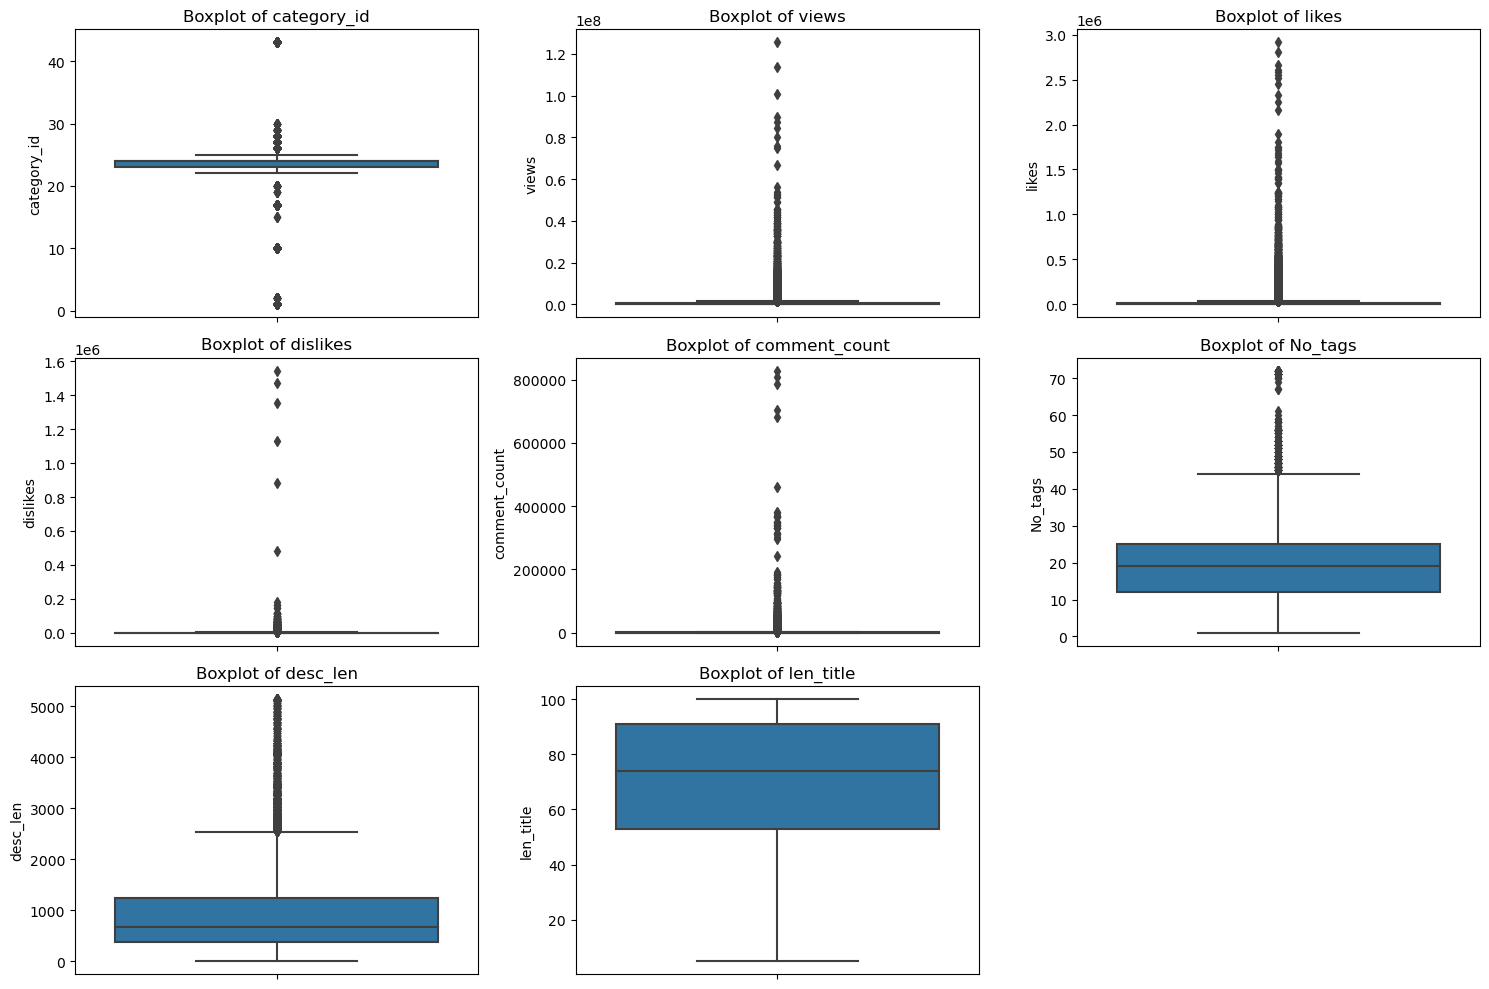

In [10]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(Youtube_nums):
    plt.subplot(len(Youtube_nums.columns)//3 + 1, 3, i + 1)
    sns.boxplot(data=Youtube_nums, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

**Results :** </br>

* There are features with outliers, namely: `views`, `likes`, `dislikes`, `comment_count`, `No_tags`, and `desc_len`. <br>
* Therefore, it is necessary to handle outliers using methods such as the Interquartile Range (IQR). <br>
* The Interquartile Range (IQR) method is more robust to outliers because it is based on percentiles (Q1 and Q3) and is not affected by extreme values, whereas the Z-Score relies on the mean and standard deviation, which can be influenced by outliers. <br>
* In this case, the data distribution with outliers is not considered representative of the overall data (Still an assumption).

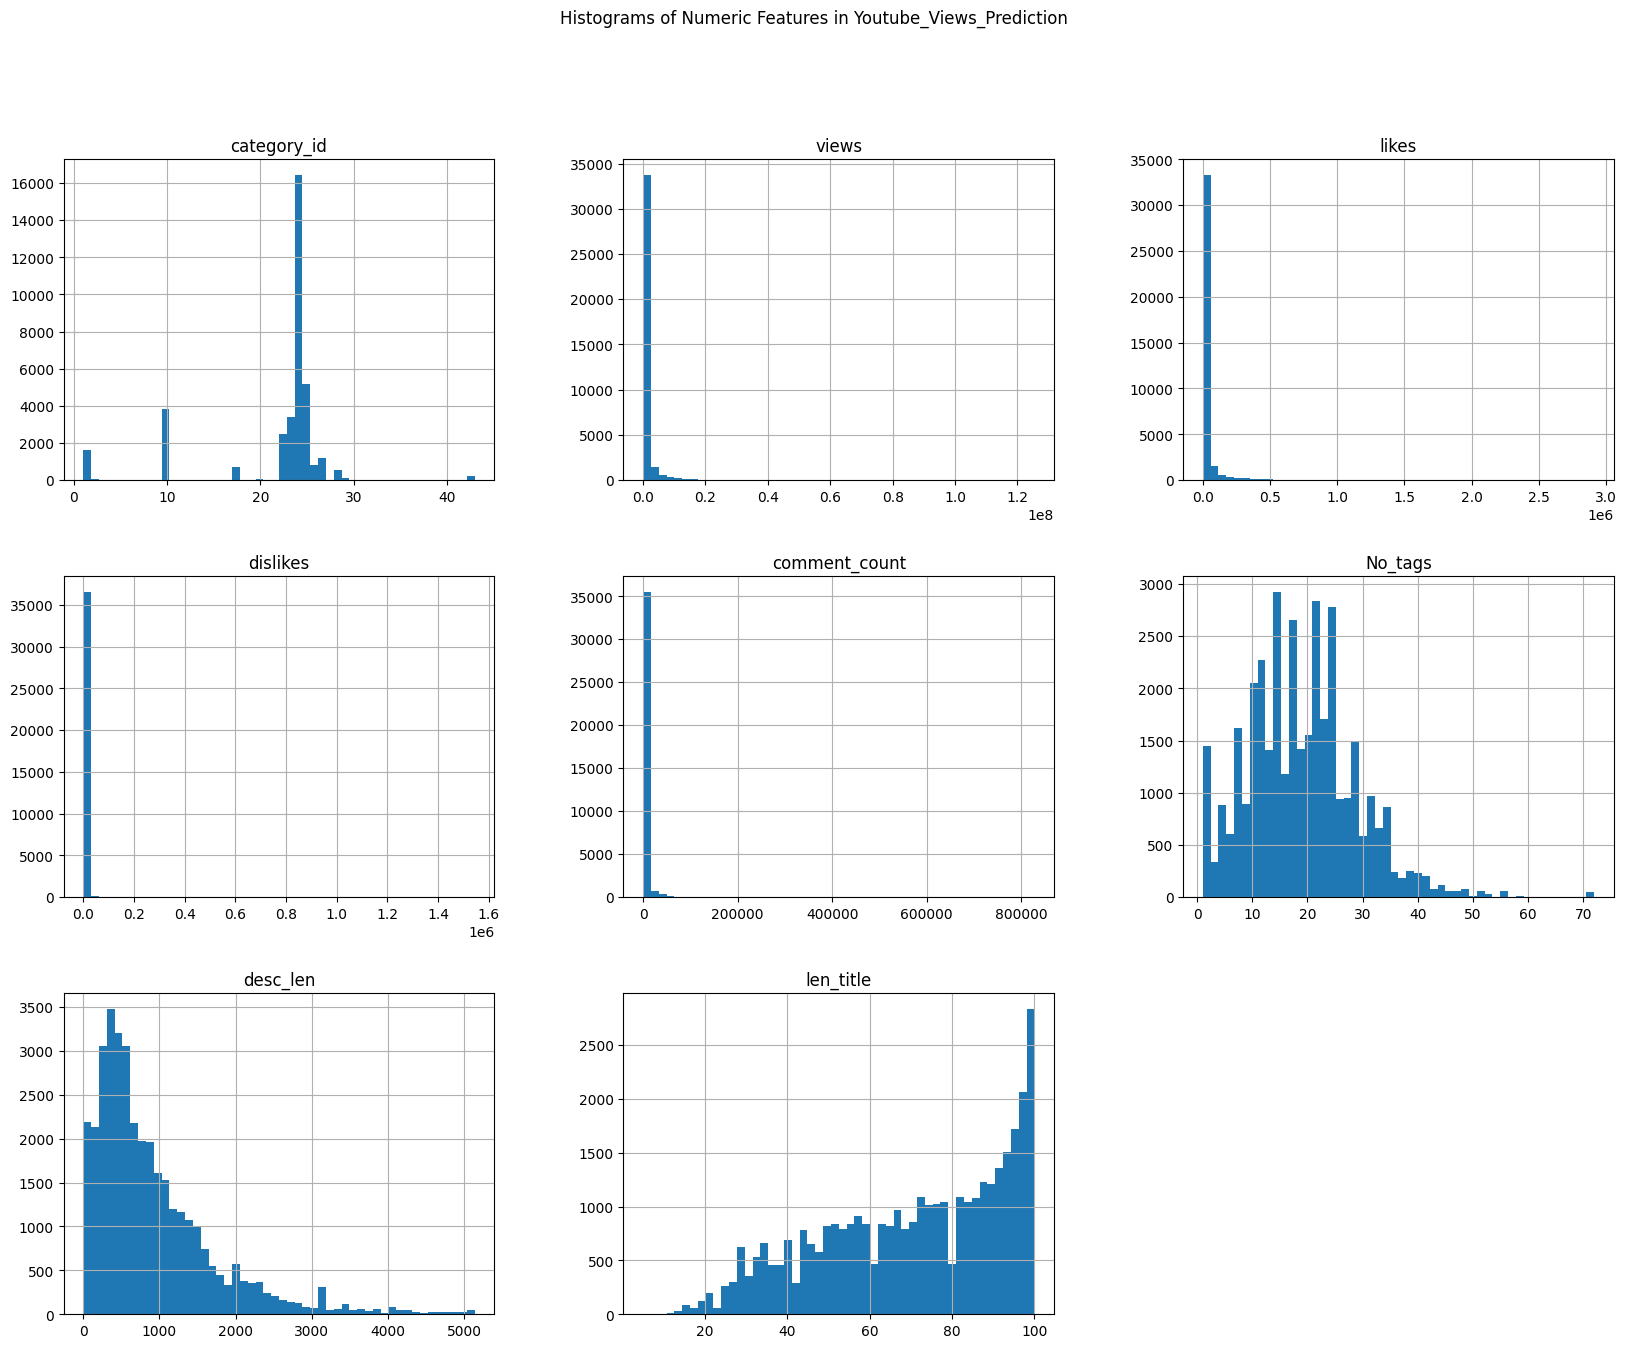

In [ ]:
# Plot distribution of each numeric feature (histogram)
Youtube_nums.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms of Numeric Features in Youtube_Views_Prediction')
plt.show()

In [ ]:
df_filtered_hist = df_master[['No_tags','len_title','desc_len']]
df_filtered_hist_2 = df_master[['views','likes','dislikes','comment_count']]

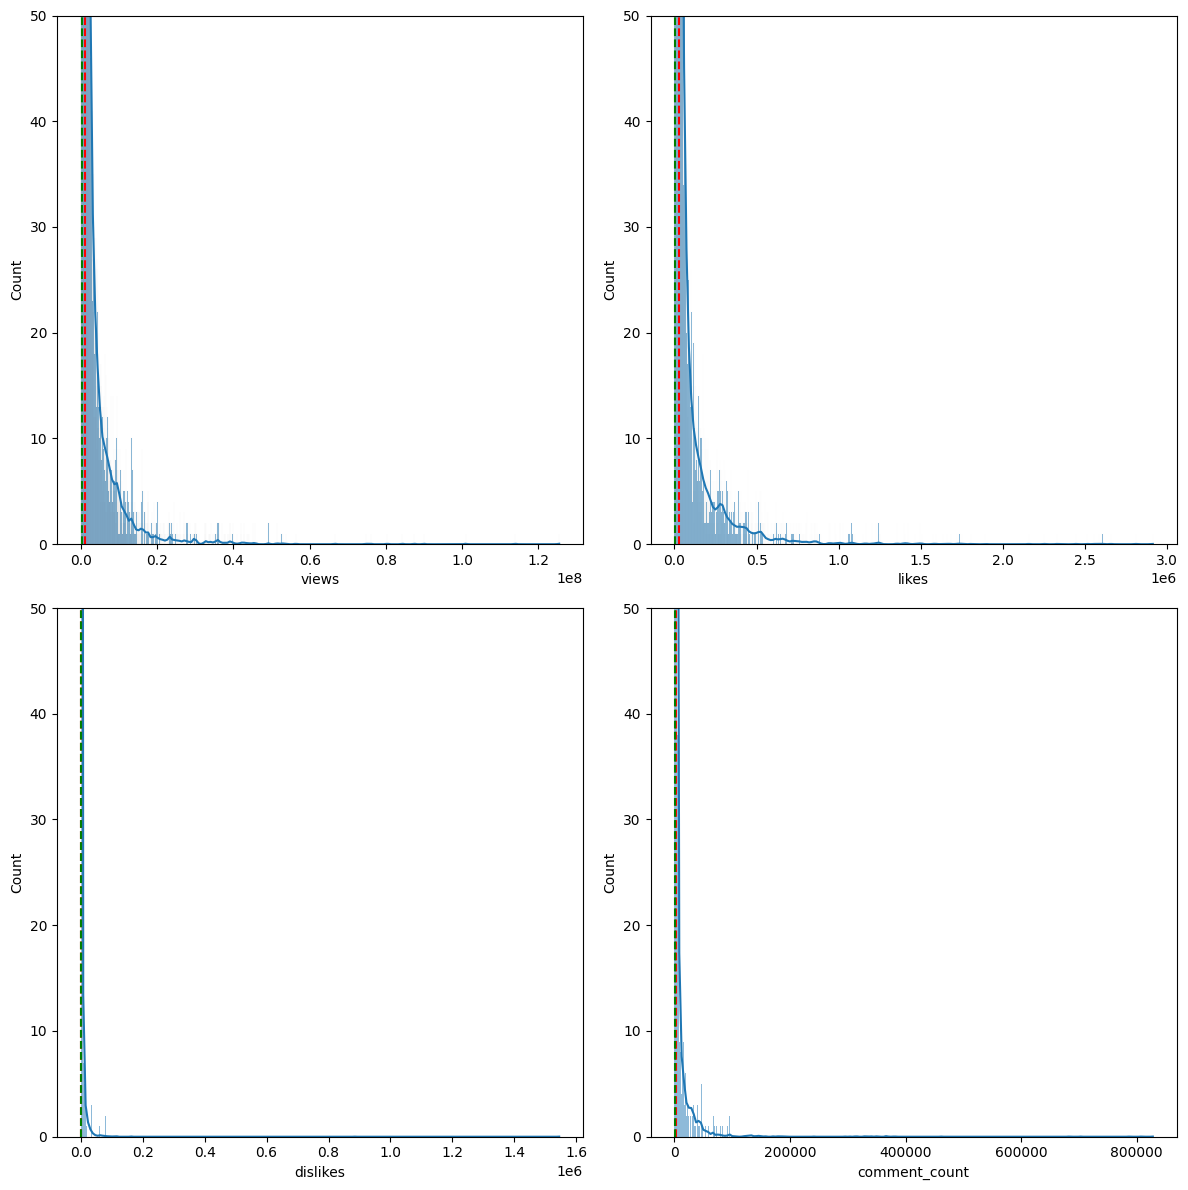

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
for i, col in enumerate(df_filtered_hist_2.columns):


    # Calculate mean, median, and mode
    mean_val = df_filtered_hist_2[col].mean()
    median_val = df_filtered_hist_2[col].median()
    mode_val = df_filtered_hist_2[col].mode().iloc[0]

# Access the correct subplot axes using proper indexing
    row = i // 2  # Calculate row index
    col_index = i % 2  # Calculate column index
    ax = axes[row, col_index]  # Access the specific subplot axes

    sns.histplot(data=df_filtered_hist_2, x=col, ax=ax, kde=True)
    ax.set_ylim(0, 50)  # Set y-axis limit

    # Add vertical lines for mean, median, and mode
    ax.axvline(x=mean_val, color='r', linestyle='dashed', label='Mean')
    ax.axvline(x=median_val, color='g', linestyle='dashed', label='Median')


plt.tight_layout()

plt.show()

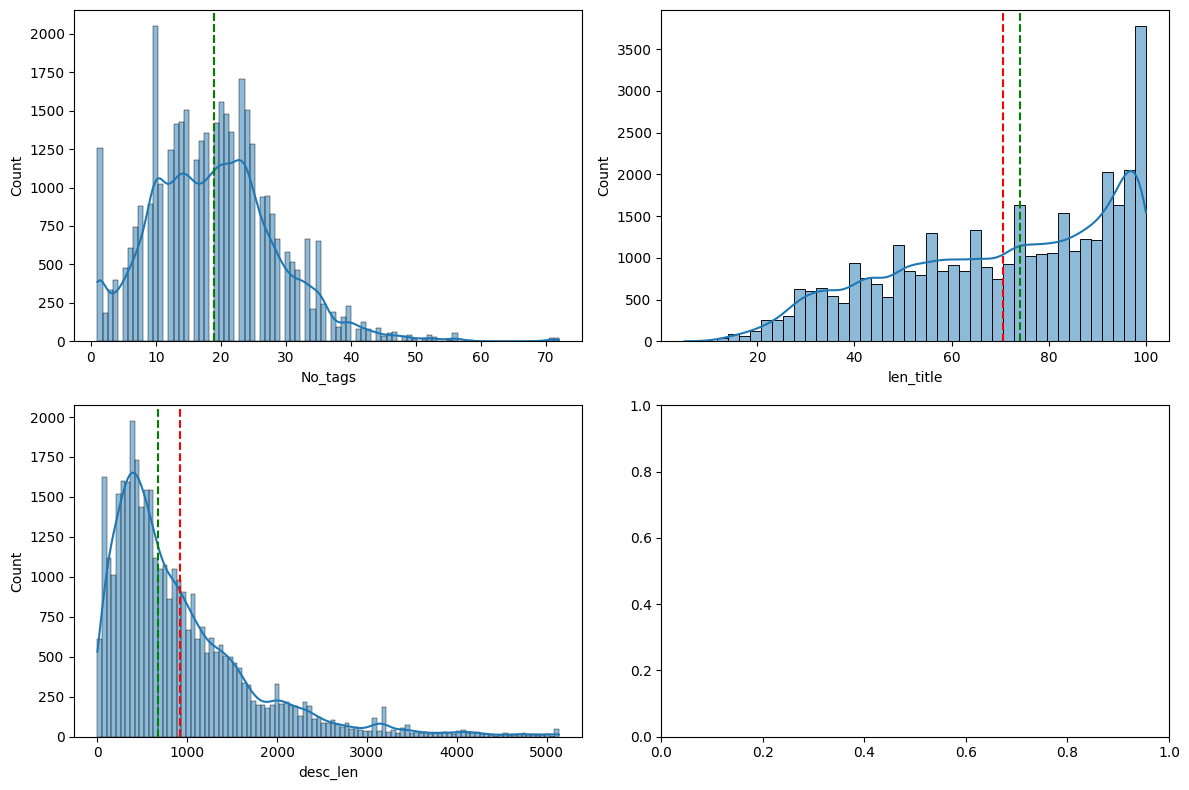

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
for i, col in enumerate(df_filtered_hist.columns):
  if col == 'No_tags' or col == 'desc_len' or col == 'len_title':


    # Calculate mean, median, and mode
    mean_val = df_filtered_hist[col].mean()
    median_val = df_filtered_hist[col].median()
    mode_val = df_filtered_hist[col].mode().iloc[0]

    # Correctly access the subplot using row and column indices
    row = i // 2  # Calculate row index
    col_index = i % 2  # Calculate column index
    ax = axes[row, col_index]  # Access the subplot using row and column indices

    sns.histplot(data=df_filtered_hist, x=col, ax=ax, kde=True)

    # Add vertical lines for mean, median, and mode
    ax.axvline(x=mean_val, color='r', linestyle='dashed', label='Mean')
    ax.axvline(x=median_val, color='g', linestyle='dashed', label='Median')


plt.tight_layout()

plt.show()

**Results :** <br>

* The histograms for `views`, `likes`, `dislikes`, and `comment_count` show that the mean is larger than the median, indicating that the graphs are positively skewed. <br>
* From the histograms, the skewness is evident in the `desc_len` and `len_title` features. <br>
* The histogram for `desc_len` shows a positive skew, with the mean being larger than the median. <br>
* The histogram for `len_title` shows a negative skew, with the mean being larger than the median. <br>

**Suggestions :** <br>

* Further analysis is needed to understand why these features exhibit skewness. <br>
* Correlation analysis should be performed for each feature to understand the relationships between them.

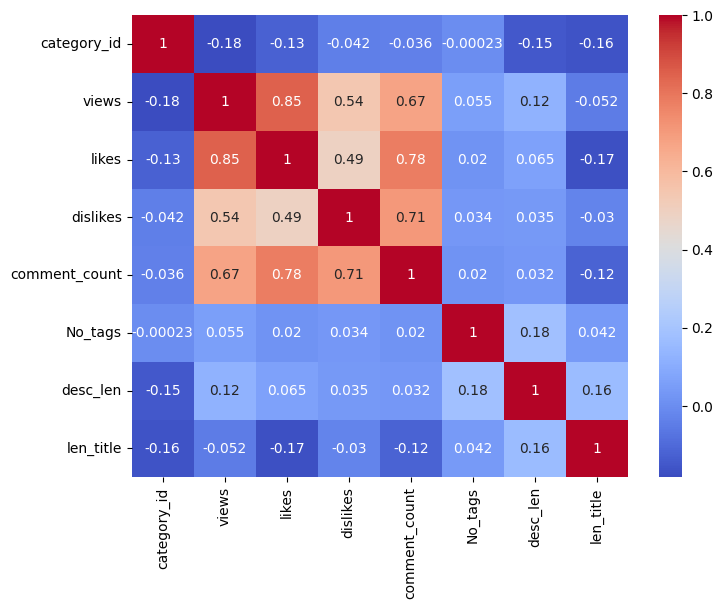

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(Youtube_nums.corr(), annot=True, cmap='coolwarm')
plt.show()

**Results:** <br>

* There is a strong correlation between `comment_count` and `views` of 0.67, `comment_count` and `likes` of 0.78, `comment_count` and `dislikes` of 0.71, `dislikes` and `views` of 0.54, `dislikes` and `likes` of 0.48, and `likes` and `views` of 0.85. <br>
* These features can be retained for use in the prediction model. <br>

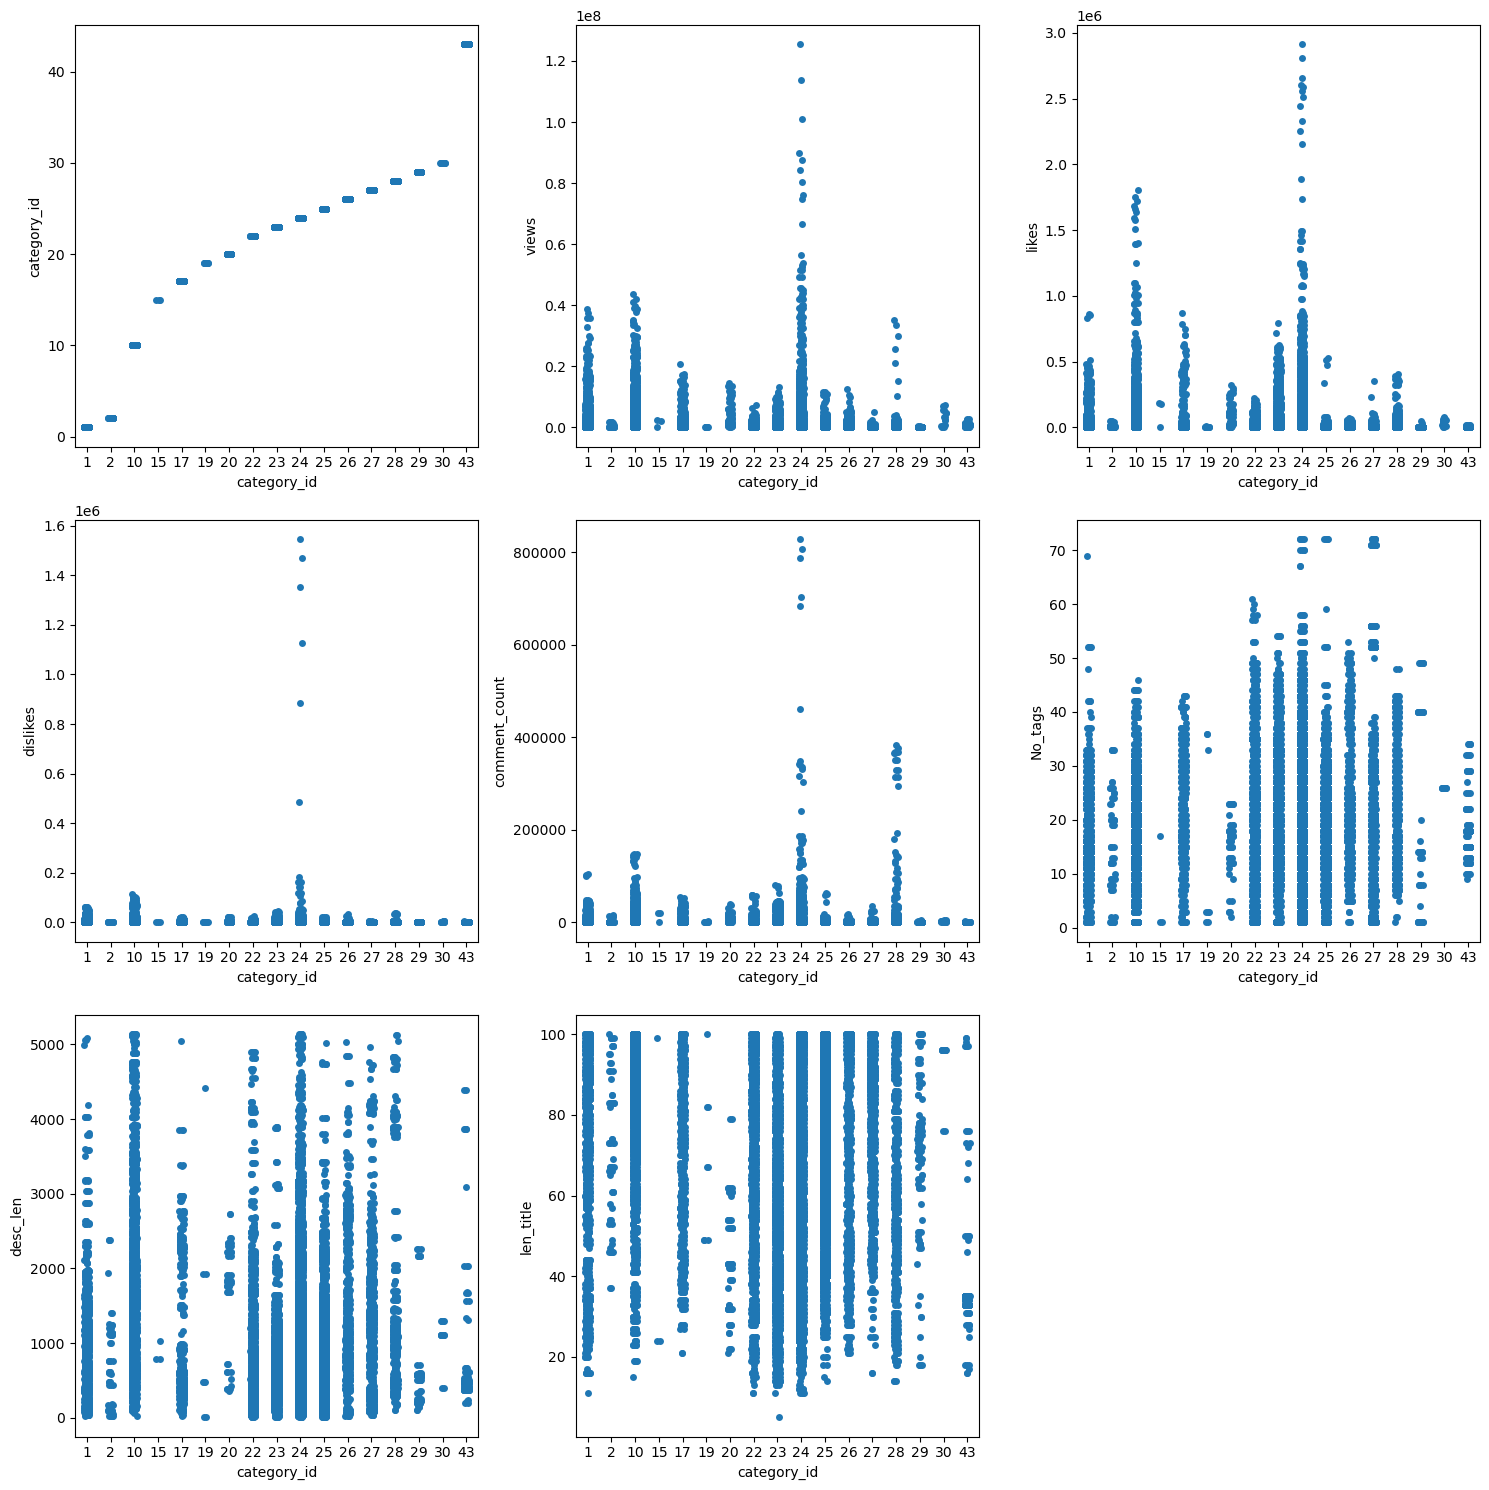

In [11]:
numeric = Youtube_nums.columns.tolist()

fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numeric)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df_master, x='category_id', y=numeric[i])
    plt.tight_layout()

**Results:**
<br>
* Based on the graph between `category ID` and the numeric features, Category 24 has the highest views, likes, dislikes, and comment counts compared to other categories. <br>
* Consideration should be given when creating the prediction model.

## **Data Cleaning and Feature Engineering**

### **Handling Missing Values :**

In [5]:
df_master['description'] = df_master['description'].fillna('Deskripsi tidak tersedia')

In [6]:
df_master.isnull().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

### **Feature Transformation**

In [7]:
df_master = pd.get_dummies(df_master, columns=['category_id'], drop_first=True)

### **Feature Engineering**

In [8]:
df_master['publish_date'] = pd.to_datetime(df_master['publish_date'], format='%Y-%m-%d')
df_master['publish_day'] = df_master['publish_date'].dt.dayofweek
df_master['publish_month'] = df_master['publish_date'].dt.month

In [9]:
df_master['publish_time'] = pd.to_datetime(df_master['publish_time'], format='%H:%M:%S')
df_master['publish_hour'] = df_master['publish_time'].dt.hour

In [10]:
df_master['trending_date'] = pd.to_datetime(df_master['trending_date'], format='%Y-%m-%d')
df_master['trending_day'] = df_master['trending_date'].dt.dayofweek
df_master['trending_month'] = df_master['trending_date'].dt.month

In [18]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  datetime64[ns]
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   publish_time            36791 non-null  datetime64[ns]
 4   tags                    36791 non-null  object        
 5   views                   36791 non-null  int64         
 6   likes                   36791 non-null  int64         
 7   dislikes                36791 non-null  int64         
 8   comment_count           36791 non-null  int64         
 9   comments_disabled       36791 non-null  bool          
 10  ratings_disabled        36791 non-null  bool          
 11  video_error_or_removed  36791 non-null  bool          
 12  description             36791 non-null  object

In [19]:
df_master.head(5)

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,...,category_id_27,category_id_28,category_id_29,category_id_30,category_id_43,publish_day,publish_month,publish_hour,trending_day,trending_month
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1900-01-01 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,...,False,False,False,False,False,6,11,12,1,11
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,1900-01-01 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,...,False,False,False,False,False,0,11,5,1,11
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,1900-01-01 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,...,False,False,False,False,False,6,11,15,1,11
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,1900-01-01 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,...,False,False,False,False,False,6,11,7,1,11
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,1900-01-01 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,...,False,False,False,False,False,0,11,1,1,11


### **Features Selection**

In [14]:
# Select only the numerical columns and save them to numerical_cols
numerical_cols = df_master.select_dtypes(include=['int32', 'int64', 'float64']).columns

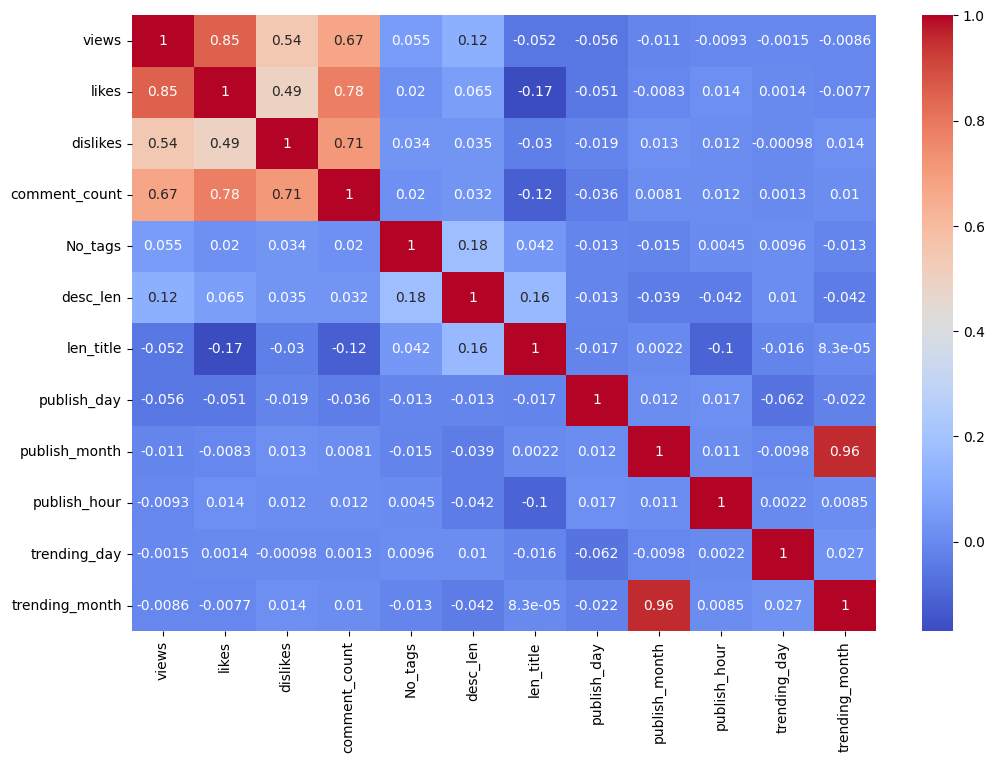

In [ ]:
# Visualize the correlation heatmap for numerical columns
plt.figure(figsize=(12,8))
sns.heatmap(df_master[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

**Dataset Splitting (Train-Test Split)**

In [15]:
X = df_master.drop(columns=['views', 'title', 'channel_title', 'trending_date', 'publish_time', 'publish_date', 'description', 'tags'])
y = df_master['views']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X.head(5)

,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,category_id_2,...,category_id_27,category_id_28,category_id_29,category_id_30,category_id_43,publish_day,publish_month,publish_hour,trending_day,trending_month
0,33966,798,882,False,False,False,15,920,81,False,...,False,False,False,False,False,6,11,12,1,11
1,735,904,0,True,False,False,19,2232,58,False,...,False,False,False,False,False,0,11,5,1,11
2,2011,243,149,False,False,False,14,482,58,False,...,False,False,False,False,False,6,11,15,1,11
3,70353,1624,2684,False,False,False,20,263,30,False,...,False,False,False,False,False,6,11,7,1,11
4,492,293,66,False,False,False,11,753,88,False,...,False,False,False,False,False,0,11,1,1,11


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   likes                   36791 non-null  int64
 1   dislikes                36791 non-null  int64
 2   comment_count           36791 non-null  int64
 3   comments_disabled       36791 non-null  bool 
 4   ratings_disabled        36791 non-null  bool 
 5   video_error_or_removed  36791 non-null  bool 
 6   No_tags                 36791 non-null  int64
 7   desc_len                36791 non-null  int64
 8   len_title               36791 non-null  int64
 9   category_id_2           36791 non-null  bool 
 10  category_id_10          36791 non-null  bool 
 11  category_id_15          36791 non-null  bool 
 12  category_id_17          36791 non-null  bool 
 13  category_id_19          36791 non-null  bool 
 14  category_id_20          36791 non-null  bool 
 15  category_id_22     

## **Training and Evaluating Models : With Raw Dataset**

### **1. Ridge Regression Method**

**Evaluation Model**: Ridge Regression <br>
**Hyperparameter Tuning:** Grid Search Method <br>
**Strategy:** Alpha (penalti L2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
ridge_model = Ridge()

# Define the hyperparameters to search over
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Set up the grid search
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Use the best model to predict on test data
best_ridge_model = grid_search.best_estimator_
y_pred = best_ridge_model.predict(X_test)

# Calculate RMSE and R2 for the tuned model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Ridge Regression RMSE: {rmse}')
print(f'Ridge Regression R2: {r2}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters: {'alpha': 0.1}
Ridge Regression RMSE: 1556592.797915718
Ridge Regression R2: 0.7139856312810167


### **2. LinearRegression Method**

**Evaluation Model:** Linear Regression <br>
**Hyperparameter Tuning:** (-)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression RMSE: {rmse}')
print(f'Linear Regression R2: {r2}')

Linear Regression RMSE: 1556593.60939734
Linear Regression R2: 0.7139853330714083


### **3. Lasso Method**

**Evaluation Model:** Lasso Regression <br>
**Hyperparameter Tuning:** Grid Search Metodh<br>
**Strategy:** Alpha (penalti L1)

In [ ]:
from sklearn.linear_model import Lasso

# Define the model
lasso_model = Lasso()

# Define the hyperparameters to search over
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Use the best model to predict on test data
best_lasso_model = grid_search.best_estimator_
y_pred = best_lasso_model.predict(X_test)

# Calculate RMSE and R2 for the tuned model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Lasso Regression RMSE: {rmse}')
print(f'Lasso Regression R2: {r2}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters: {'alpha': 0.001}
Lasso Regression RMSE: 1556593.6097664437
Lasso Regression R2: 0.7139853329357673


In [ ]:
print(X_train.dtypes)

likes                     int64
dislikes                  int64
comment_count             int64
comments_disabled          bool
ratings_disabled           bool
video_error_or_removed     bool
No_tags                   int64
desc_len                  int64
len_title                 int64
category_id_2              bool
category_id_10             bool
category_id_15             bool
category_id_17             bool
category_id_19             bool
category_id_20             bool
category_id_22             bool
category_id_23             bool
category_id_24             bool
category_id_25             bool
category_id_26             bool
category_id_27             bool
category_id_28             bool
category_id_29             bool
category_id_30             bool
category_id_43             bool
publish_day               int32
publish_month             int32
publish_hour              int32
trending_day              int32
trending_month            int32
dtype: object


### **4. Gradient Boosting Regressor Method**

In [14]:
# Gradient Boosting Initialization
gb_model = GradientBoostingRegressor()

# Define the hyperparameter grid untuk tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

best_gb_model = grid_search.best_estimator_
y_gb = best_gb_model.predict(X_test)

# Calculating RMSE and R^2
rmse = np.sqrt(mean_squared_error(y_test, y_gb))
r2 = r2_score(y_test, y_gb)

print(f'Gradient Boosting RMSE: {rmse}')s
print(f'Gradient Boosting R²: {r2}')

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Gradient Boosting RMSE: 451625.8887541455
Gradient Boosting R²: 0.9759233823110683


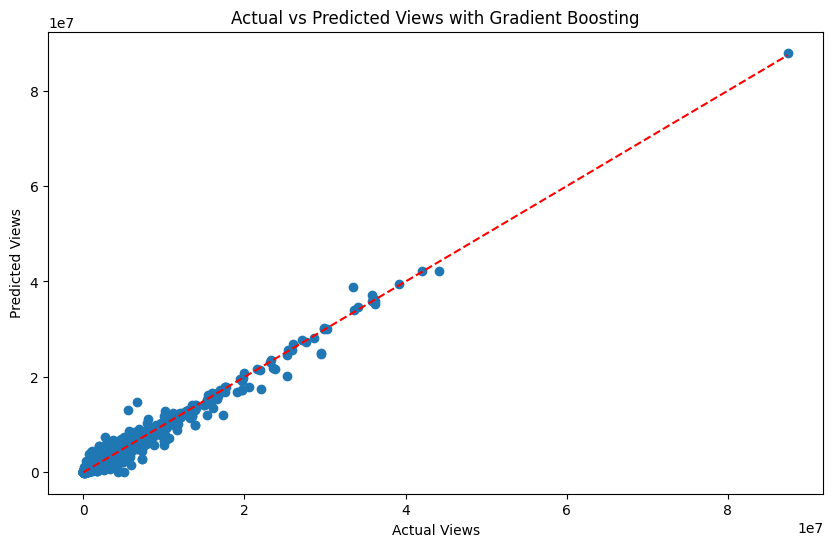

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_gb)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs Predicted Views with Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### **5. RandomForestRegressor Method**

**Evaluation Model:** Random Forest Regression <br>
**Hyperparameter Tuning:** Grid Search Metodh <br>
**Strategy:** n_estimators, max_depth

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf_model = RandomForestRegressor()

# Set up grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model after tuning
best_rf_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred_rf = best_rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R^2: {r2_rf}')


Random Forest RMSE: 506443.9311277656
Random Forest R^2: 0.969723856104912


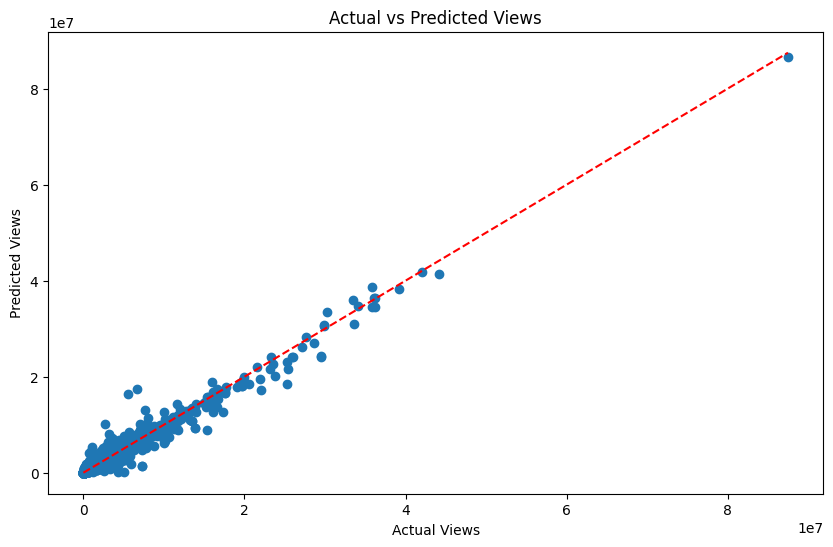

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs Predicted Views')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

### What these metrics mean: Gradient Boosting


#### 1. **RMSE (Root Mean Squared Error):** 451.625,88
   - The **RMSE** measures the average difference between the predicted `views` and the actual `views`.
   - In this case, the **RMSE of 451.625,88** means that, on average, the Random Forest model's predictions are off by approximately **451.625 views**.
   - This is a **much lower RMSE** compared to the Linear Regression model's RMSE (1.556.593,60), which indicates that Gradient Boosting is making far more accurate predictions.

#### 2. **R-squared (R²):** 0,9759
   - The **R² of 0,9759** indicates that the Random Forest model explains about **97,59% of the variance** in the `views` data.
   - An **R² value closer to 1** means the model fits the data very well, capturing nearly all the variability in the target variable. In this case, the Gradient Boosting model is capturing significantly more variance than the Linear Regression model (which had an R² of 0.7139).

**Conclusion :**
This could be applied for Random Forest Regressor.  

# Final Decision

### **Machine Learning Method Selection :**

In [2]:
results = pd.DataFrame(columns=["Action","Metode", "RMSE", "R²"]) 

In [3]:
# 1.Raw Data - Ridge Regression
results = pd.concat([results, pd.DataFrame([{
    "Action": 'Raw Data',
    "Metode": 'Ridge Regression', 
    "RMSE" : '1.556.592,79',
    "R²"  : '0,7139'}])], ignore_index=True)

# 2.Raw Data - Linear Regression
results = pd.concat([results, pd.DataFrame([{
    "Action": 'Raw Data',
    "Metode": 'Linear Regression', 
    "RMSE" : '1.556.593,60',
    "R²"  : '0,7139'}])], ignore_index=True)

# 3.Raw Data - Lasso Regression
results = pd.concat([results, pd.DataFrame([{
    "Action": 'Raw Data',
    "Metode": 'Lasso Regression', 
    "RMSE" : '1.556.593,60',
    "R²"  : '0,7139'}])], ignore_index=True)

# 4.Raw Data - Gradient Boosting
results = pd.concat([results, pd.DataFrame([{
    "Action": 'Raw Data',
    "Metode": 'Gradient Boosting', 
    "RMSE" : '451.625,88',
    "R²"  : '0,9759'}])], ignore_index=True)

# 5.Raw Data - Random Forest
results = pd.concat([results, pd.DataFrame([{
    "Action": 'Raw Data',
    "Metode": 'Random Forest', 
    "RMSE" : '506.443,93',
    "R²"  : '0,9697'}])], ignore_index=True)

# Membuat DataFrame
results_df = pd.DataFrame(results)

# Menampilkan DataFrame dengan style untuk tabel yang lebih rapi
results_styled = results_df.style.set_properties(**{
    'text-align': 'left',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black')]}
])

results_styled

,Action,Metode,RMSE,R²
0,Raw Data,Ridge Regression,"1.556.592,79","0,7139"
1,Raw Data,Linear Regression,"1.556.593,60","0,7139"
2,Raw Data,Lasso Regression,"1.556.593,60","0,7139"
3,Raw Data,Gradient Boosting,"451.625,88","0,9759"
4,Raw Data,Random Forest,"506.443,93","0,9697"


Based on the results of testing with the original data: <br>
The **lowest RMSE** value indicates the smallest error. <br>
The **highest R²** value indicates the best ability to explain the data. <br>
Therefore, the selected machine learning models were the **Gradient Boosting** and **Random Forest** methods.

## **Training and Evaluating Models : With Pre-Processing**

### **1. IQR Method for Outlier Handling - Random Forest Performance**



In [10]:
X = df_master.drop(columns=['views', 'title', 'channel_title', 'trending_date', 'publish_time', 'publish_date', 'description', 'tags'])
y = df_master['views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = X_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

In [11]:
Q1 = X_train[numerical_cols].quantile(0.25)
Q3 = X_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Lower bound and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from X_train and y_train
X_train_filtered = X_train[~((X_train[numerical_cols] < lower_bound) | (X_train[numerical_cols] > upper_bound)).any(axis=1)]
y_train_filtered = y_train[X_train_filtered.index]

# Check the size of the data after removing outliers
print(f'Ukuran data train setelah penghapusan outliers: {X_train_filtered.shape}')

Ukuran data train setelah penghapusan outliers: (22584, 30)


In [12]:
# Hyperparameter tuning using Grid Search
IQR_model = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

# Set up the grid search
grid_search_IQR = GridSearchCV(estimator=IQR_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model on filtered training data
grid_search_IQR.fit(X_train_filtered, y_train_filtered)

# Best hyperparameters
best_params = grid_search_IQR.best_params_
print(f'Best hyperparameters: {best_params}')

# Use the best model to predict on test data
best_rf_model = grid_search_IQR.best_estimator_
y_pred_IQR = best_rf_model.predict(X_test)

# Calculate RMSE and R2 for the tuned model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_IQR))
r2_rf = r2_score(y_test, y_pred_IQR)

print(f'Random Forest RMSE setelah IQR: {rmse_rf}')
print(f'Random Forest R^2 setelah IQR: {r2_rf}')

Best hyperparameters: {'max_depth': None, 'n_estimators': 200}
Random Forest RMSE setelah IQR: 2630018.6444161944
Random Forest R^2 setelah IQR: 0.18350134676626517


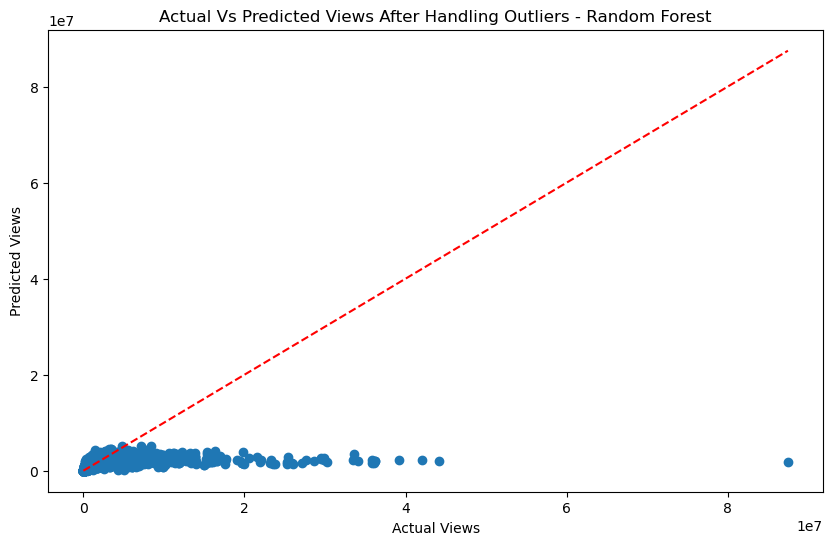

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_IQR)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual Vs Predicted Views After Handling Outliers - Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - Before Pre-processing Using IQR Method** <br>
Random Forest RMSE: 506443.9311277656 <br>
Random Forest R²: 0.969723856104912 <br>

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - After Pre-processing Using IQR Method** <br>
Best hyperparameters: {'max_depth': None, 'n_estimators': 100} <br>
Random Forest RMSE setelah IQR: 2630018.6444161944 <br>
Random Forest R² setelah IQR: 0.18350134676626517 <br>

**Conclusion:** <br>

* The IQR method was used to handle outliers by removing data points that exceed the set thresholds. <br>
* The results obtained were: <br>
  * R² (R-squared) of 0.1835 (approximately 18,35%), meaning the model can only explain 19% of the variance in the data (predicted views or other targets). <br>
  * RMSE (Root Mean Squared Error) of 2.630.018,64 , indicating that the average prediction error of the model is approximately 2.63 million units from the actual value. <br>
* It is likely that outliers contain valuable information, as there is a significant difference in the results before and after handling outliers using the IQR method. <br>
* The decision was made to retain the outliers in order to avoid losing important data/information. <br>

### **2. Log Transformasion for Pre-Processing - Random Forest Performance**

In [ ]:
X = df_master.drop(columns=['views', 'title', 'channel_title', 'trending_date', 'publish_time', 'publish_date', 'description', 'tags'])
y = df_master['views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = X_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

In [12]:
# Apply log transformation to numeric columns to address outliers.
# Add a small value (e.g., 1) to avoid log(0) or log(negative values)
X_train_log_transformed = X_train.copy()
X_train_log_transformed[numerical_cols] = X_train[numerical_cols].apply(lambda x: np.log1p(x))  # log1p(x) == log(x + 1)

# For the test data, apply the transformation as well
X_test_log_transformed = X_test.copy()
X_test_log_transformed[numerical_cols] = X_test[numerical_cols].apply(lambda x: np.log1p(x))

# Check the data after log transformation
print(X_train_log_transformed.head())

           likes  dislikes  comment_count  comments_disabled  \
36069   9.382443  7.321189       6.466145              False   
8897   10.589862  6.959399       7.384610              False   
26072   6.431331  5.241747       4.672829              False   
6258    5.961005  2.639057       3.663562              False   
29917  10.858152  7.069023       8.421563              False   

       ratings_disabled  video_error_or_removed   No_tags  desc_len  \
36069             False                   False  3.178054  6.800170   
8897              False                   False  3.178054  8.196437   
26072             False                   False  2.197225  6.045005   
6258              False                   False  2.995732  6.903747   
29917             False                   False  3.871201  6.486161   

       len_title  category_id_2  ...  category_id_27  category_id_28  \
36069   4.127134          False  ...           False           False   
8897    4.595120          False  ...        

In [13]:
# Hyperparameter tuning using Grid Search
gs_model = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

# Set up the grid search
grid_search_log = GridSearchCV(estimator=gs_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model on log-transformed training data
grid_search_log.fit(X_train_log_transformed, y_train)

# Best hyperparameters
best_params = grid_search_log.best_params_
print(f'Best hyperparameters: {best_params}')

# Use the best model to predict on log-transformed test data
best_rf_model = grid_search_log.best_estimator_
y_grid_search = best_rf_model.predict(X_test_log_transformed)

# Calculate RMSE and R2 for the tuned model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_grid_search))
r2_rf = r2_score(y_test, y_grid_search)

# Print evaluation results
print(f'Random Forest RMSE setelah log transformasi: {rmse_rf}')
print(f'Random Forest R² setelah log transformasi: {r2_rf}')

Best hyperparameters: {'max_depth': None, 'n_estimators': 100}
Random Forest RMSE setelah log transformasi: 496302.1684785854
Random Forest R² setelah log transformasi: 0.9709243010356591


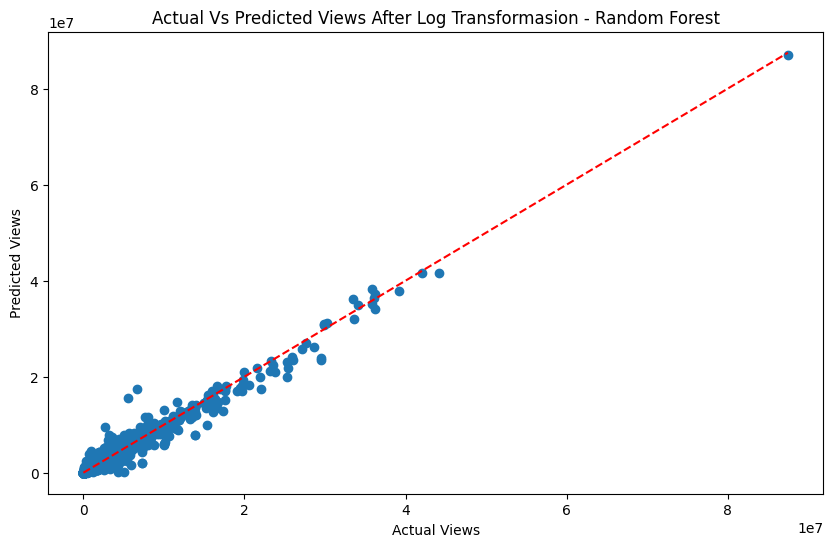

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_grid_search)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual Vs Predicted Views After Log Transformasion - Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - Before Pre-processing** <br>
Random Forest RMSE: 506443.9311277656 <br>
Random Forest R²: 0.969723856104912 <br>

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - After Pre-processing Using Log Transformation**<br>
Best hyperparameters: {'max_depth': None, 'n_estimators': 50} <br>
Random Forest RMSE setelah log transformasi: 496302.1684785854 <br>
Random Forest R² setelah log transformasi: 0.9709243010356591 <br>

**Conclusion:** <br>
* Handling outliers or pre-processing using log transformation is more effective than using IQR. <br>
  * This is because IQR handles outliers by removing data points that exceed the set threshold. <br>
  * In contrast, log transformation does not directly detect outliers but reduces their influence by flattening the data distribution through logarithmic transformation. <br>

### **3. Log Transformasion for Pre-Processing - GradientBoostingRegressor Performance**

In [ ]:
X = df_master.drop(columns=['views', 'title', 'channel_title', 'trending_date',
                             'publish_time', 'publish_date', 'description', 'tags'])
y = df_master['views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = X_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

In [13]:
# Log transformasi for Handling Outliers
X_train_log_transformed = X_train.copy()
X_train_log_transformed[numerical_cols] = X_train[numerical_cols].apply(lambda x: np.log1p(x))  # log1p(x) == log(x + 1)

X_test_log_transformed = X_test.copy()
X_test_log_transformed[numerical_cols] = X_test[numerical_cols].apply(lambda x: np.log1p(x))

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_log_transformed, y_train)

best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

best_gb_model = grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test_log_transformed)

# Calculating RMSE & R^2
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting RMSE setelah log transformasi dan tuning: {rmse_gb}')
print(f'Gradient Boosting R² setelah log transformasi dan tuning: {r2_gb}')

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Gradient Boosting RMSE setelah log transformasi dan tuning: 449643.87327388936
Gradient Boosting R² setelah log transformasi dan tuning: 0.9761342449614391


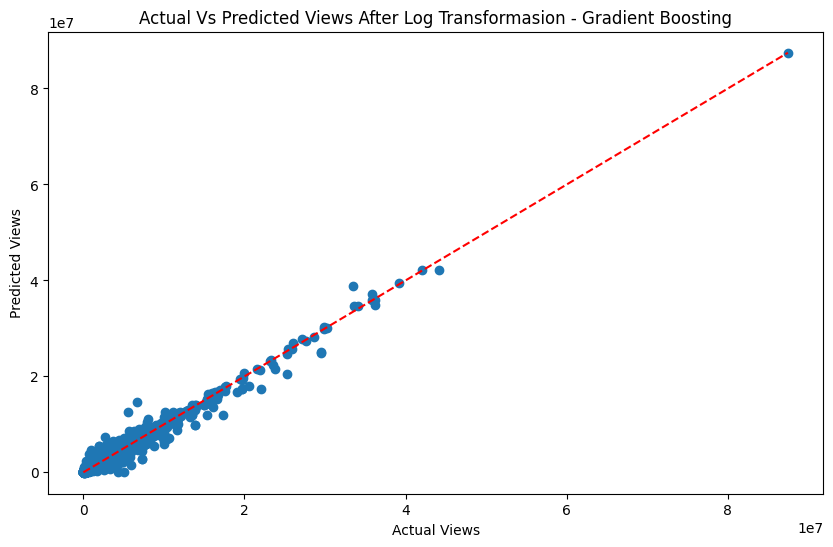

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual Vs Predicted Views After Log Transformasion - Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - After Pre-processing Using Log Transformation**<br>
Best hyperparameters: {'max_depth': None, 'n_estimators': 50} <br>
Random Forest RMSE setelah log transformasi: 496302.1684785854 <br>
Random Forest R² setelah log transformasi: 0.9709243010356591 <br>

**Results: R² and RMSE with Gradient Boosting Evaluation Method - After Pre-processing Using Log Transformation**<br>
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100} <br>
Gradient Boosting RMSE setelah log transformasi: 449643.87327388936 <br>
Gradient Boosting R² setelah log transformasi: 0.9761342449614391 <br>

**Conclusion:** <br>
Gradient Boosting achieved lower RMSE and higher R² compared to the Random Forest Regressor in the machine learning experiment. <br>

### **4. Power Transformasion for Pre-Processing - Random Forest Performance**

In [ ]:
X = df_master.drop(columns=['views', 'title', 'channel_title', 'trending_date', 'publish_time', 'publish_date', 'description', 'tags'])
y = df_master['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_cols = X_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

In [14]:
# Power Transformer Initialization
power_transformer = PowerTransformer()

# Power Transformasi for Handling Outliers
X_train_power_transformed = X_train.copy()
X_train_power_transformed[numerical_cols] = power_transformer.fit_transform(X_train[numerical_cols])

X_test_power_transformed = X_test.copy()
X_test_power_transformed[numerical_cols] = power_transformer.transform(X_test[numerical_cols])

# Check data after handling outliers
print(X_train_power_transformed.head())

# Hyperparameter tuning using Grid Search
rf_power = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}
grid_search_power = GridSearchCV(estimator=rf_power, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to data training
grid_search_power.fit(X_train_power_transformed, y_train)

# Best hyperparameters
best_params = grid_search_power.best_params_
print(f'Best hyperparameters: {best_params}')

# Use the best model to predict on power-transformed test data
best_rf_model = grid_search_power.best_estimator_
y_pred_power = best_rf_model.predict(X_test_power_transformed)

# Calculate RMSE and R2 for the tuned model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_power))
r2_rf = r2_score(y_test, y_pred_power)

# Print evaluation results
print(f'Random Forest RMSE setelah Power Transformasi: {rmse_rf}')
print(f'Random Forest R² setelah Power Transformasi: {r2_rf}')

          likes  dislikes  comment_count  comments_disabled  ratings_disabled  \
36069  0.529018  0.843238       0.292879              False             False   
8897   1.134359  0.628256       0.733157              False             False   
26072 -0.782456 -0.345372      -0.518394              False             False   
6258  -0.971338 -1.682707      -0.948293              False             False   
29917  1.274771  0.693023       1.251510              False             False   

       video_error_or_removed   No_tags  desc_len  len_title  category_id_2  \
36069                   False  0.476783  0.295947  -0.508974          False   
8897                    False  0.476783  2.170877   1.304310          False   
26072                   False -1.141884 -0.511209  -1.809378          False   
6258                    False  0.092713  0.416966   0.523106          False   
29917                   False  2.435084 -0.055272  -0.508974          False   

       ...  category_id_27  category_i

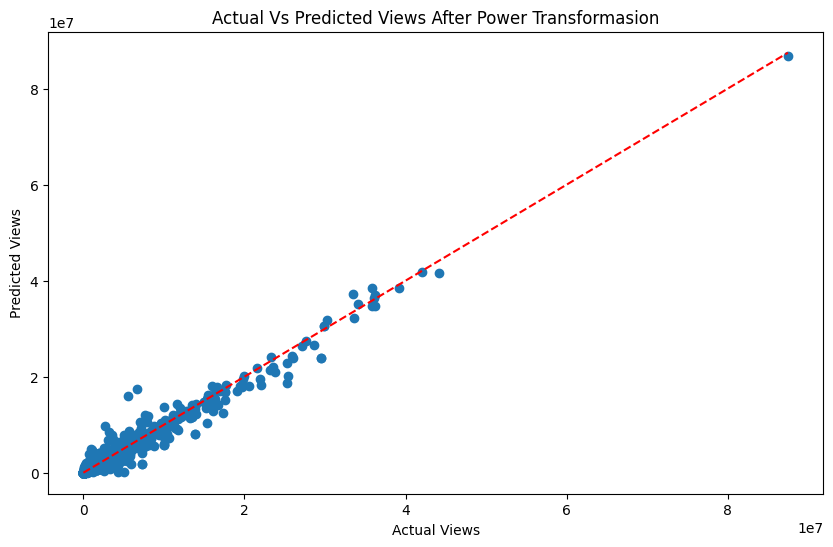

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_power)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual Vs Predicted Views After Power Transformasion')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - Before Pre-processing Using IQR Method** <br>
Random Forest RMSE: 506443.9311277656 <br>
Random Forest R^2: 0.969723856104912 <br>

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - After Pre-processing Power Transformasion** <br>
Best hyperparameters: {'max_depth': None, 'n_estimators': 50}  <br>
Random Forest RMSE setelah Power Transformasi: 506877.32098147
Random Forest R² setelah Power Transformasi: 0.9696720162581678

**Conclution :** <br>
The RMSE and R² results after power transformation pre-processing are reasonable and acceptable <br>

### **5. Removes Duplicate Values for Pre-Processing - Random Forest Performance**

In [11]:
# Step 1: Remove duplicate rows
df_master.drop_duplicates(inplace=True)

# Step 2: Define features and target (X, y) after removing duplicates
X = df_master.drop(columns=['views', 'title', 'channel_title', 'trending_date', 'publish_time', 'publish_date', 'description', 'tags'])
y = df_master['views']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define the model
rf_duplicates = RandomForestRegressor()

# Step 5: Set up hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search_duplicates = GridSearchCV(estimator=rf_duplicates, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Step 6: Fit the model on training data
grid_search_duplicates.fit(X_train, y_train)

# Step 7: Predict on test data
y_pred_duplicates = grid_search_duplicates.best_estimator_.predict(X_test)

# Step 8: Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_duplicates))
r2 = r2_score(y_test, y_pred_duplicates)

print("Best Hyperparameters (Remove Duplicates):", grid_search_duplicates.best_params_)
print("RMSE (Remove Duplicates):", rmse)
print("R²(Remove Duplicates):", r2)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters (Remove Duplicates): {'max_depth': None, 'n_estimators': 100}
RMSE (Remove Duplicates): 614084.4140826282
R²(Remove Duplicates): 0.964274065633999


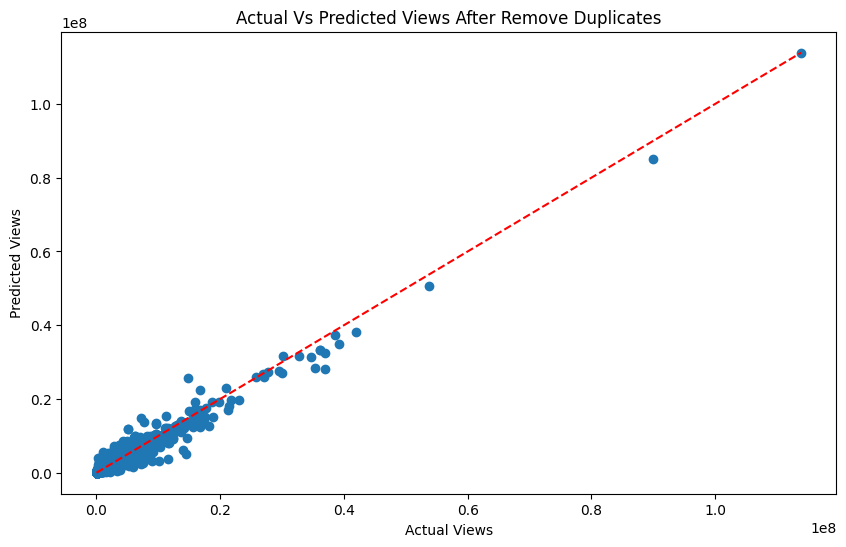

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_duplicates)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual Vs Predicted Views After Remove Duplicates')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - Before Pre-processing Using IQR Method** <br>
Random Forest RMSE: 506443.9311277656 <br>
Random Forest R^2: 0.969723856104912 <br>

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - After Pre-processing Remove Duplicates Values** <br>
Best Hyperparameters (Remove Duplicates): {'max_depth': None, 'n_estimators': 100} <br>
RMSE (Remove Duplicates): 614084.4140826282 <br>
R²(Remove Duplicates): 0.964274065633999 <br>

**Conclution :** <br>
The RMSE and R² results after removes duplicates pre-processing are reasonable and acceptable <br>

### **6.Yeo-Johnson for Pre-Processing - Random Forest Performance**

In [ ]:
X = df_master.drop(columns=['views', 'title', 'channel_title', 'trending_date', 'publish_time', 'publish_date', 'description', 'tags'])
y = df_master['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_cols = X_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

In [14]:
# Yeo-Johnson Initialization
pt = PowerTransformer(method='yeo-johnson', standardize=False)  # Yeo-Johnson can handle both positive and negative values
X_train_yeojohnson_transformed = X_train.copy()

X_train_yeojohnson_transformed[numerical_cols] = pt.fit_transform(X_train[numerical_cols])
X_test_yeojohnson_transformed = X_test.copy()
X_test_yeojohnson_transformed[numerical_cols] = pt.transform(X_test[numerical_cols])

# RandomForest Model Initialization
YJ_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_YJ = GridSearchCV(estimator=YJ_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_YJ.fit(X_train_yeojohnson_transformed, y_train)

best_rf_model = grid_search_YJ.best_estimator_

y_pred_YJ = best_rf_model.predict(X_test_yeojohnson_transformed)

# Calculating RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test,y_pred_YJ))

# Calculating R²
r2_rf = r2_score(y_test, y_pred_YJ)

print(f'Random Forest RMSE setelah Yeo-Johnson: {rmse_rf}')
print(f'Random Forest R² setelah Yeo-Johnson: {r2_rf}')

best_params = grid_search_YJ.best_params_
print(f'Best hyperparameters for Yeo-Johnson: {best_params}')

Random Forest RMSE setelah Yeo-Johnson: 490317.0434733608
Random Forest R² setelah Yeo-Johnson: 0.9716213457073651
Best hyperparameters for Yeo-Johnson: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


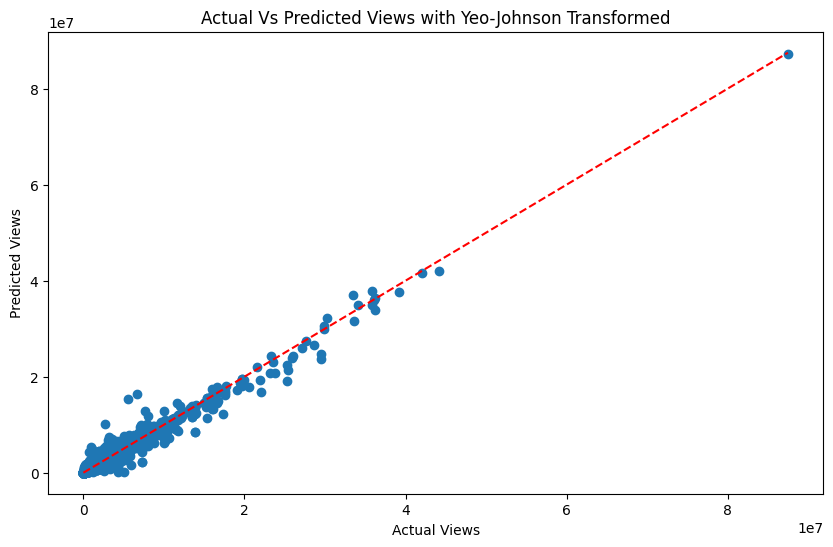

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred_YJ)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual Vs Predicted Views with Yeo-Johnson Transformed')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - Before Pre-processing** <br>
Random Forest RMSE: 506443.9311277656 <br>
Random Forest R^2: 0.969723856104912 <br>

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - After Pre-processing Yeo-Johnson Transformation** <br>
Random Forest RMSE setelah Yeo-Johnson: 490317.0434733608 <br>
Random Forest R² setelah Yeo-Johnson: 0.9716213457073651 <br>

**Conclution :** <br>
The RMSE and R² results after Yeo-Johnson transformation pre-processing are reasonable and acceptable <br>

### **7.Yeo-Johnson for Pre-Processing - Gradient Boosting Performance**

In [ ]:
X = df_master.drop(columns=['views', 'title', 'channel_title', 'trending_date', 
                             'publish_time', 'publish_date', 'description', 'tags'])
y = df_master['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_cols = X_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

In [12]:
# Yeo-Johnson Initialization
power_transformer = PowerTransformer(method='yeo-johnson')
X_train[numerical_cols] = power_transformer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = power_transformer.transform(X_test[numerical_cols])

# Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculating RMSE dan R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
RMSE: 462955.1608784838
R²: 0.9747002821449362


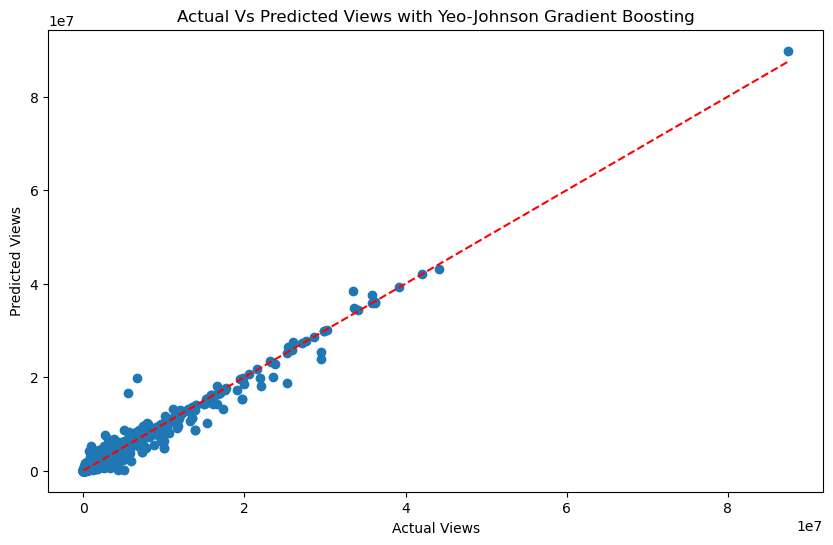

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual Vs Predicted Views with Yeo-Johnson Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - After Pre-processing Yeo-Johnson Transformation** <br>
Random Forest RMSE setelah Yeo-Johnson: 490317.0434733608 <br>
Random Forest R² setelah Yeo-Johnson: 0.9716213457073651 <br>

**Results: R² and RMSE with Gradient Boosting Evaluation Method - After Pre-processing Yeo-Johnson Transformation** <br>
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} <br>
RMSE: 462955.1608784838 <br>
R²: 0.9747002821449362  <br>

**Conclution :** <br>
* The RMSE and R² results after Yeo-Johnson transformation pre-processing using Gradient Boosting methode are reasonable and acceptable <br>
* Gradient Boosting achieved lower RMSE and higher R² compared to the Random Forest Regressor in the machine learning experiment

### **8. Min-Max Scaler for Pre-Processing - Random Forest Performance**

In [ ]:
X = df_master.drop(columns=['views', 'title', 'channel_title', 'trending_date', 'publish_time', 'publish_date', 'description', 'tags'])
y = df_master['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_cols = X_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

In [12]:
# MinMaxScaler Initialization
scaler = MinMaxScaler()

X_train_minmax_scaled = X_train.copy()
X_train_minmax_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_minmax_scaled = X_test.copy()
X_test_minmax_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# RandomForest
MinMax_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_minmax = GridSearchCV(estimator=MinMax_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_minmax.fit(X_train_minmax_scaled, y_train)
best_rf_model = grid_search_minmax.best_estimator_

y_pred_minmax = best_rf_model.predict(X_test_minmax_scaled)

# Calculating RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_minmax))

# Calculating R²
r2_rf = r2_score(y_test, y_pred_minmax)

print(f'Random Forest RMSE setelah MinMaxScaler: {rmse_rf}')
print(f'Random Forest R² setelah MinMaxScaler: {r2_rf}')

best_params = grid_search_minmax.best_params_
print(f'Best hyperparameters for Min-Max Scaler: {best_params}')

Random Forest RMSE setelah MinMaxScaler: 509410.4045805632
Random Forest R² setelah MinMaxScaler: 0.9693681349260406
Best hyperparameters for Min-Max Scaler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


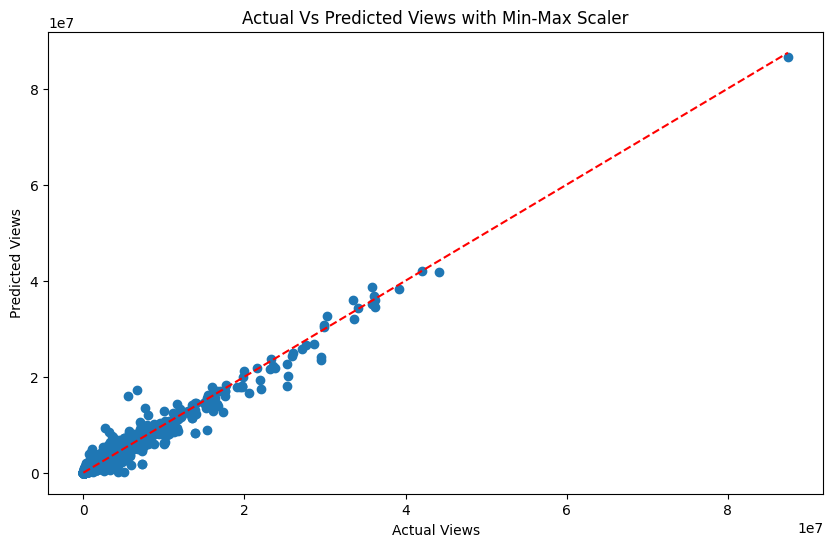

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred_minmax)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual Vs Predicted Views with Min-Max Scaler')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - Before Pre-processing** <br>
Random Forest RMSE: 506443.9311277656 <br>
Random Forest R^2: 0.969723856104912 <br>

**Results: R² and RMSE with RandomForestRegressor Evaluation Method - After Pre-processing Min-Max Scaler** <br>
Random Forest RMSE setelah MinMaxScaler: 509410.4045805632 <br>
Random Forest R² setelah MinMaxScaler: 0.9693681349260406 <br>

**Conclution :** <br>
The RMSE and R² results after Min-Max Scaler pre-processing are reasonable and acceptable<br>

# Final Decision

### **Selection of Pre-processing Steps :**

In [4]:
results_prepro = pd.DataFrame(columns=["Action","Metode", "RMSE", "R^2"]) 

In [5]:
# 1.Pre-Processing - Random Forest - Handling Outliers
results_prepro = pd.concat([results_prepro, pd.DataFrame([{
    "Action": 'Handling Outliers with IQR Method',
    "Metode": 'Random Forest', 
    "RMSE" : '2.630.018,64',
    "R^2"  : '0,1835'}])], ignore_index=True)

# 2.Pre-Processing - Random Forest - Log Transformation
results_prepro = pd.concat([results_prepro, pd.DataFrame([{
    "Action": 'Pre-Processing Log Transformation',
    "Metode": 'Random Forest', 
    "RMSE" : '496.302,16',
    "R^2"  : '0,9709'}])], ignore_index=True)

# 3.Pre-Processing - Gradient Boosting - Log Transformasi
results_prepro = pd.concat([results_prepro, pd.DataFrame([{
    "Action": 'Pre-Processing Log Transformasi',
    "Metode": 'Gradient Boosting', 
    "RMSE" : '449.643,87',
    "R^2"  : '0,9761'}])], ignore_index=True)

# 4.Pre-Processing - Random Forest - Remove Duplicates
results_prepro = pd.concat([results_prepro, pd.DataFrame([{
    "Action": 'Pre-Processing Remove Duplicates',
    "Metode": 'Random Forest', 
    "RMSE" : '614.084,41',
    "R^2"  : '0,9642'}])], ignore_index=True)

# 5.Pre-Processing - Random Forest - Power Transformation
results_prepro = pd.concat([results_prepro, pd.DataFrame([{
    "Action": 'Pre-Processing Power Transformation',
    "Metode": 'Random Forest', 
    "RMSE" : '506.877,32',
    "R^2"  : '0,9696'}])], ignore_index=True)

# 6.Pre-Processing - Random Forest - Yeo-Johnson Transformation
results_prepro = pd.concat([results_prepro, pd.DataFrame([{
    "Action": 'Pre-Processing Yeo-Johnson Transformation',
    "Metode": 'Random Forest', 
    "RMSE" : '490.317,04',
    "R^2"  : '0,9716'}])], ignore_index=True)

# 7.Pre-Processing - Gradient Boosting - Yeo-Johnson Transformation
results_prepro = pd.concat([results_prepro, pd.DataFrame([{
    "Action": 'Pre-Processing Yeo-Johnson Transformation',
    "Metode": 'Gradient Boosting', 
    "RMSE" : '462.955,16',
    "R^2"  : '0,9747'}])], ignore_index=True)

# 8.Pre-Processing - Random Forest - MinMax Scaler
results_prepro = pd.concat([results_prepro, pd.DataFrame([{
    "Action": 'Pre-Processing MinMax Scaler',
    "Metode": 'Random Forest', 
    "RMSE" : '509.410,40',
    "R^2"  : '0,9693'}])], ignore_index=True)

# Membuat DataFrame
results_2 = pd.DataFrame(results_prepro)

# Menampilkan DataFrame dengan style untuk tabel yang lebih rapi
results_styled2 = results_2.style.set_properties(**{
    'text-align': 'left',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f7f7f9'), ('color', 'black')]}
])

results_styled2

,Action,Metode,RMSE,R^2
0,Handling Outliers with IQR Method,Random Forest,"2.630.018,64","0,1835"
1,Pre-Processing Log Transformation,Random Forest,"496.302,16","0,9709"
2,Pre-Processing Log Transformasi,Gradient Boosting,"449.643,87","0,9761"
3,Pre-Processing Remove Duplicates,Random Forest,"614.084,41","0,9642"
4,Pre-Processing Power Transformation,Random Forest,"506.877,32","0,9696"
5,Pre-Processing Yeo-Johnson Transformation,Random Forest,"490.317,04","0,9716"
6,Pre-Processing Yeo-Johnson Transformation,Gradient Boosting,"462.955,16","0,9747"
7,Pre-Processing MinMax Scaler,Random Forest,"509.410,40","0,9693"


* This step aims to identify which pre-processing steps should be performed and which are better avoided. This decision is based on the presence of a large number of duplicate data entries (4,229 out of 36,791 rows) and an imbalanced data distribution with many outliers. To determine the most appropriate pre-processing steps, tests were conducted by applying them to machine learning models and evaluating their impact on model performance. <br>
 <br>
* The final pre-processing steps applied are as follows:  <br>
    - Selected machine learning method: Random Forest  <br>
    - Removed duplicate values  <br>
    - Applied Yeo-Johnson Transformation  <br>
    - Applied Logarithmic Transformation  <br>

# Final Testing - Random Forest

Final testing: <br>
* The remove.duplicates() process was performed. <br>
* Logarithmic Transformation was applied. <br>
* Yeo-Johnson Transformation was applied. <br>
* Random Forest Regressor model evaluation was performed. <br>

In [11]:
# drop duplicate values
df_master.drop_duplicates(inplace=True)

X = df_master.drop(columns=['views', 'title', 'channel_title', 'trending_date', 
                             'publish_time', 'publish_date', 'description', 'tags'])
y = df_master['views']
y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_cols = X_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

# Log Transformation
X_train[numerical_cols] = np.log1p(X_train[numerical_cols])
X_test[numerical_cols] = np.log1p(X_test[numerical_cols])

# Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
X_train_transformed = pt.fit_transform(X_train[numerical_cols])
X_test_transformed = pt.transform(X_test[numerical_cols])

# Applying Log and Yeo-Johnson Transformations to the training data
X_train[numerical_cols] = X_train_transformed
X_test[numerical_cols] = X_test_transformed

# Random Forest Regressor

rfr = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Calculatin RMSE dan R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Reverting predictions to the original scale when using log transformation
y_pred_original_scale = np.expm1(y_pred)

# Calculating RMSE and R² on the original scale
rmse_original_scale = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred_original_scale))
r2_original_scale = r2_score(np.expm1(y_test), y_pred_original_scale)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'RMSE (Log Scale): {rmse}')
print(f'R² (Log Scale): {r2}')
print(f'RMSE (Original Scale): {rmse_original_scale}')
print(f'R² (Original Scale): {r2_original_scale}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE (Log Scale): 0.4351348184793407
R² (Log Scale): 0.9054166154908203
RMSE (Original Scale): 658671.975548374
R² (Original Scale): 0.9588977290044013


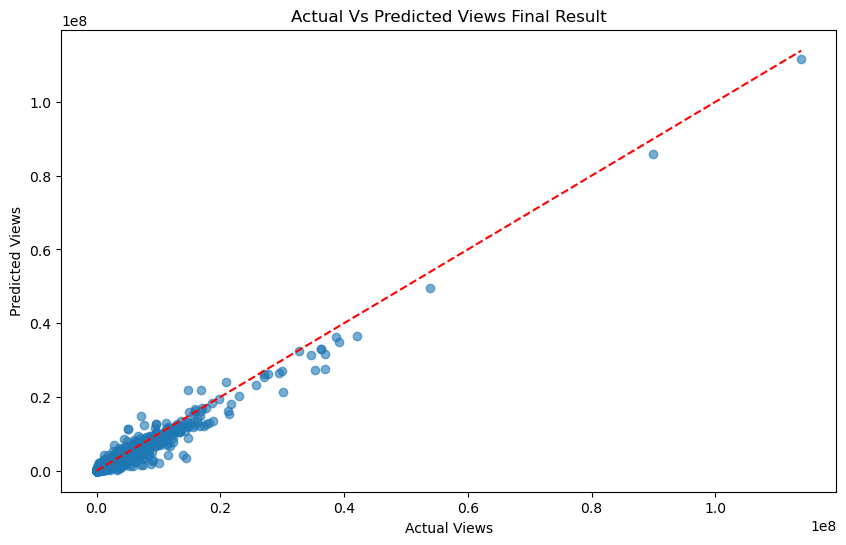

In [12]:
# Konversi skala
y_test_original_scale = np.expm1(y_test)
y_pred_original_scale = np.expm1(y_pred)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original_scale, y_pred_original_scale, alpha=0.6)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual Vs Predicted Views Final Result')
plt.plot([min(y_test_original_scale), max(y_test_original_scale)], 
         [min(y_test_original_scale), max(y_test_original_scale)], 
         color='red', linestyle='--')
plt.show()

**Conclution :** <br>
* There was a decline in results compared to the previous process, which may be attributed to the removal of duplicate data. <br>
* However, this range of values is still acceptable as a final decision, as the machine learning model is still considered reasonably good at predicting the number of YouTube viewers. <br>
* For more optimal results, there are many possibilities that can still be explored.
* However, in this analysis, the RMSE is 658.671,97 , indicating an average prediction error of approximately 658.671 units, and the R² is 0,9588 , meaning the model can explain 95,88% of the variation in the data (number of views). <br>

# Final Testing - Gradient Boosting

Final testing: <br>
* The remove.duplicates() process was performed. <br>
* Logarithmic Transformation was applied. <br>
* Yeo-Johnson Transformation was applied. <br>
* Gradient Boosting Regressor model evaluation was performed. <br>

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

df_master.drop_duplicates(inplace=True)
X = df_master.drop(columns=['views', 'title', 'channel_title', 'trending_date', 
                             'publish_time', 'publish_date', 'description', 'tags'])
y = df_master['views']

# Using log transformasi on 'views' if the value > 0
y = np.log1p(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numerical features
numerical_cols = X_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

# Using log transformation for numerical features
X_train[numerical_cols] = np.log1p(X_train[numerical_cols])
X_test[numerical_cols] = np.log1p(X_test[numerical_cols])

# Using Yeo-Johnson Transformation for numerical features
pt = PowerTransformer(method='yeo-johnson')
X_train_transformed = pt.fit_transform(X_train[numerical_cols])
X_test_transformed = pt.transform(X_test[numerical_cols])

X_train[numerical_cols] = X_train_transformed
X_test[numerical_cols] = X_test_transformed

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# best model
best_model = grid_search.best_estimator_

# Test data prediction
y_pred = best_model.predict(X_test)

# RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

y_pred_original_scale = np.expm1(y_pred)

# RMSE and R² on the original scale
rmse_original_scale = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred_original_scale))
r2_original_scale = r2_score(np.expm1(y_test), y_pred_original_scale)

# View the results
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'RMSE (Log Scale): {rmse}')
print(f'R² (Log Scale): {r2}')
print(f'RMSE (Original Scale): {rmse_original_scale}')
print(f'R² (Original Scale): {r2_original_scale}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
RMSE (Log Scale): 0.3870800774446883
R² (Log Scale): 0.9251539617593884
RMSE (Original Scale): 631691.7843859759
R² (Original Scale): 0.9621959870171901


**Conclution :** <br>
* There was a decline in results compared to the previous process, which may be attributed to the removal of duplicate data. <br>
* However, this range of values is still acceptable as a final decision, as the machine learning model is still considered reasonably good at predicting the number of YouTube viewers. <br>
* For more optimal results, there are many possibilities that can still be explored.
* However, in this analysis, the RMSE is 631.691,78 , indicating an average prediction error of approximately 631.691 units, and the R² is 0,9621 , meaning the model can explain 96,21% of the variation in the data (number of views). <br>
* This result is taken as the final modeling decision for the system and its future application.